In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: improve aesthetics
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('ai_model_kpi_data2.csv')
df.head()

,Ques_ID_Prompt,Model,Model_Category,Question_Category,Answer_Rating_0_5,Electricity_consumption_Wh,CO2_Emission_gm,Inference_Timing_sec
0,1,Gemma 3nb,Small,Easy Factual,4,0.19,0.12,1.9
1,1,Llama 3.1 8b,Small,Easy Factual,5,9.00,6.00,3.0
2,1,Mistral Small,Medium,Easy Factual,4,0.77,0.44,2.8
3,1,GPT 20 OSS,Medium,Easy Factual,5,0.37,0.23,2.5
4,1,GPT 5,Large,Easy Factual,5,1.52,0.93,12.0


In [5]:

df.rename(columns={
    'Ques_ID_Prompt': 'Question_ID',
    'Answer_Rating_0_5': 'Rating',
    'Electricity_consumption_Wh': 'Electricity_Wh',
    'CO2_Emission_gm': 'CO2_g',
    'Inference_Timing_sec': 'Inference_s'
}, inplace=True)

# Ensure correct data types
# df['Question_ID_Prompt'] = df['Question_ID_Prompt'].astype(int)
# df['Model'] = df['Model'].astype(str)

# # Optional: highlight math questions
# df['Is_Math'] = df['Question_ID'].isin([2, 7])  # example math question IDs

In [6]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Electricity_Wh',
    y='Rating',
    color='Model_Category',
    symbol='Question_Category',
    hover_data=['Model', 'CO2_g', 'Inference_s'],
    title='Quality vs Energy by Model and Question Category'
)
fig.show()

In [7]:
fig = px.scatter(
    df,
    x='CO2_g',
    y='Rating',
    color='Model_Category',
    symbol='Question_Category',
    hover_data=['Model', 'Electricity_Wh', 'Inference_s'],
    title='Quality vs Carbon Emission by Category'
)
fig.show()

In [8]:
fig = px.box(
    df,
    x='Model_Category',
    y='Inference_s',
    color='Model_Category',
    title='Latency Distribution by Model Category'
)
fig.show()

### 4. 🏆 Best Trade-Off Table (Grouped by Model Category

In [9]:
df['Score'] = (
    df['Rating'] * 2
    - df['Electricity_Wh'] * 0.5
    - df['CO2_g'] * 0.5
    - df['Inference_s'] * 0.2
).round(2)

tradeoff_table = df.groupby(['Model_Category', 'Model']).agg({
    'Rating': 'mean',
    'Electricity_Wh': 'mean',
    'CO2_g': 'mean',
    'Inference_s': 'mean',
    'Score': 'mean'
}).round(2).sort_values(by='Score', ascending=False)

tradeoff_table.reset_index(inplace=True)
tradeoff_table

,Model_Category,Model,Rating,Electricity_Wh,CO2_g,Inference_s,Score
0,Medium,Mistral Small,3.90,2.24,1.34,5.73,4.86
1,Small,Gemma 3nb,3.93,1.78,1.43,8.87,4.49
2,Medium,GPT 20 OSS,3.77,2.77,1.72,6.73,3.94
3,Small,Llama 3.1 8b,3.67,5.80,3.77,8.45,0.86
4,Large,GPT 5,3.33,35.16,24.86,29.18,-29.18
5,Large,DeepSeek R1,3.80,57.40,33.07,27.90,-43.21


C:\Users\Gaurav Chugh\AppData\Local\Temp\ipykernel_59616\3230649521.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


C:\Users\Gaurav Chugh\AppData\Local\Temp\ipykernel_59616\3230649521.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




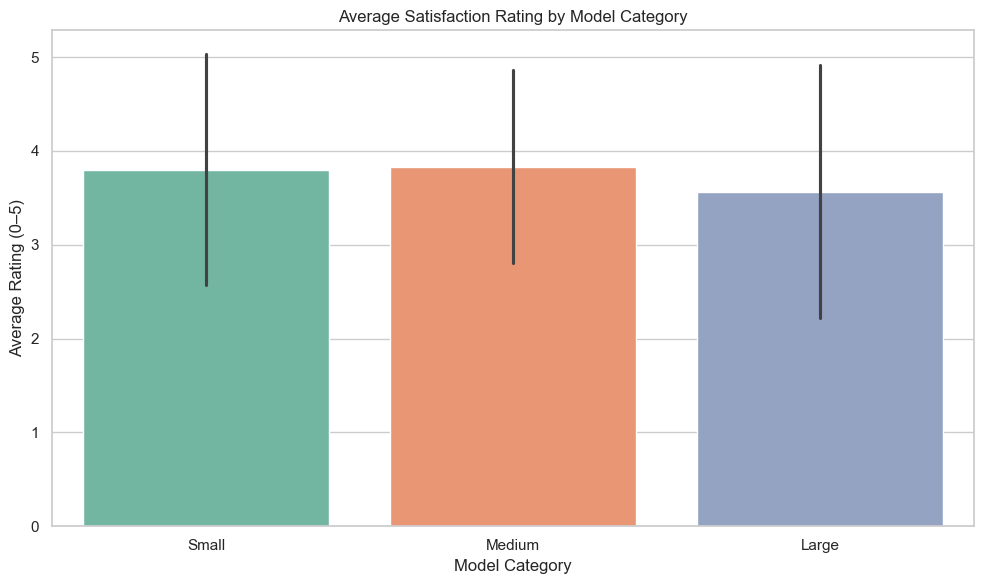

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model_Category', y='Rating', estimator='mean', ci='sd', palette='Set2')
plt.title('Average Satisfaction Rating by Model Category')
plt.ylabel('Average Rating (0–5)')
plt.xlabel('Model Category')
plt.tight_layout()
plt.show()

### ⚡ 2. Grouped Bar Chart — Energy & Carbon by Question Category

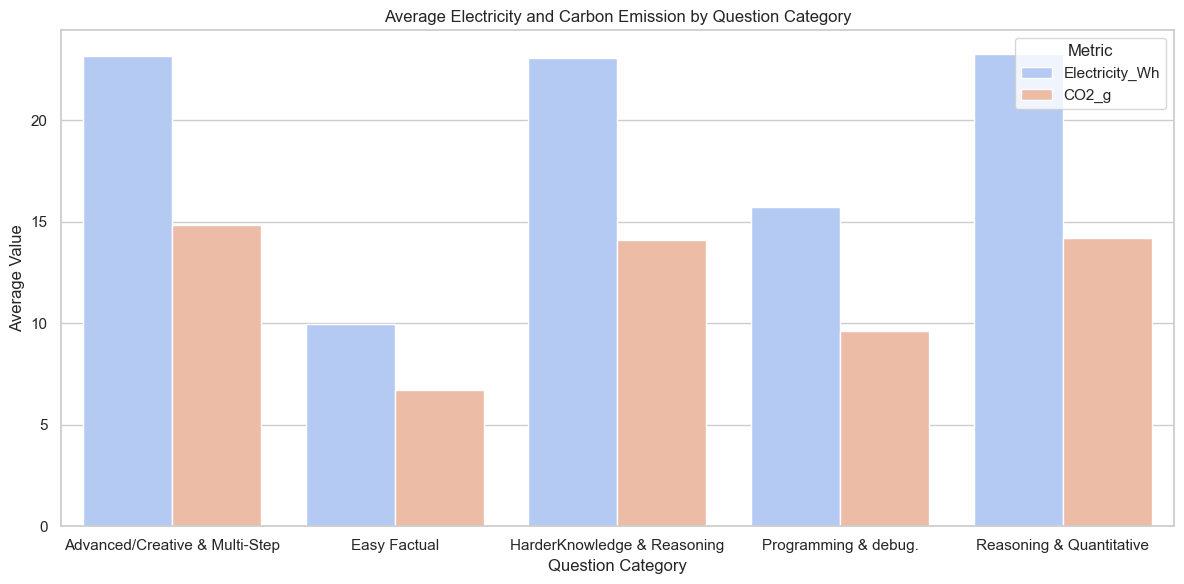

In [11]:
agg = df.groupby('Question_Category')[['Electricity_Wh', 'CO2_g']].mean().reset_index()
agg_melted = agg.melt(id_vars='Question_Category', var_name='Metric', value_name='Average')

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_melted, x='Question_Category', y='Average', hue='Metric', palette='coolwarm')
plt.title('Average Electricity and Carbon Emission by Question Category')
plt.ylabel('Average Value')
plt.xlabel('Question Category')
plt.tight_layout()
plt.show()


### ⏱️ 3. Box Plot — Inference Time by Question Category
- Box plots reveal distribution, median, and outliers.
- Helps you spot which question types cause latency spikes.

C:\Users\Gaurav Chugh\AppData\Local\Temp\ipykernel_59616\2325750637.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




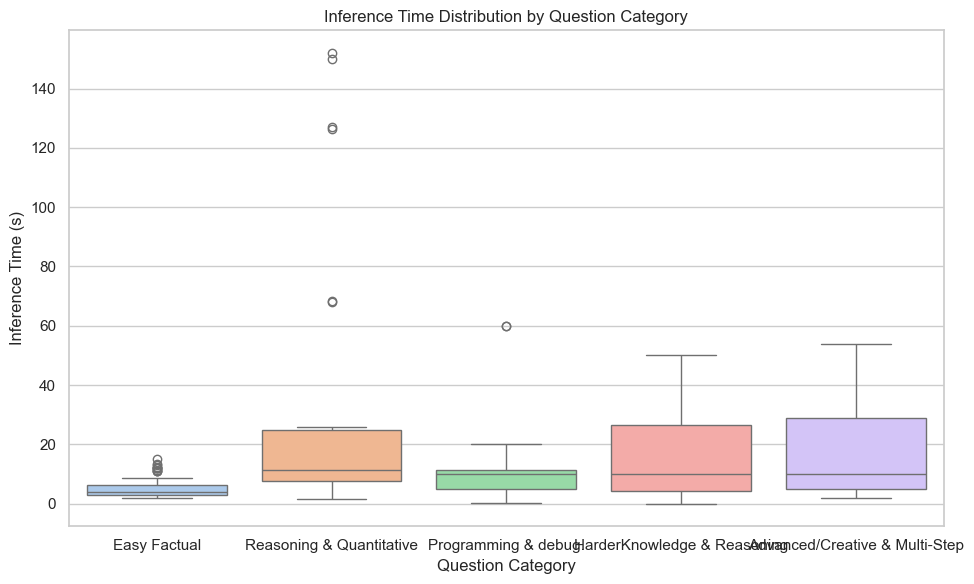

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Question_Category', y='Inference_s', palette='pastel')
plt.title('Inference Time Distribution by Question Category')
plt.ylabel('Inference Time (s)')
plt.xlabel('Question Category')
plt.tight_layout()
plt.show()

### 🌐 4. Heatmap — KPI Averages by Model vs Question Category
- Heatmaps are excellent for cross-dimensional comparisons.
- You can instantly see which model-question combinations perform best.

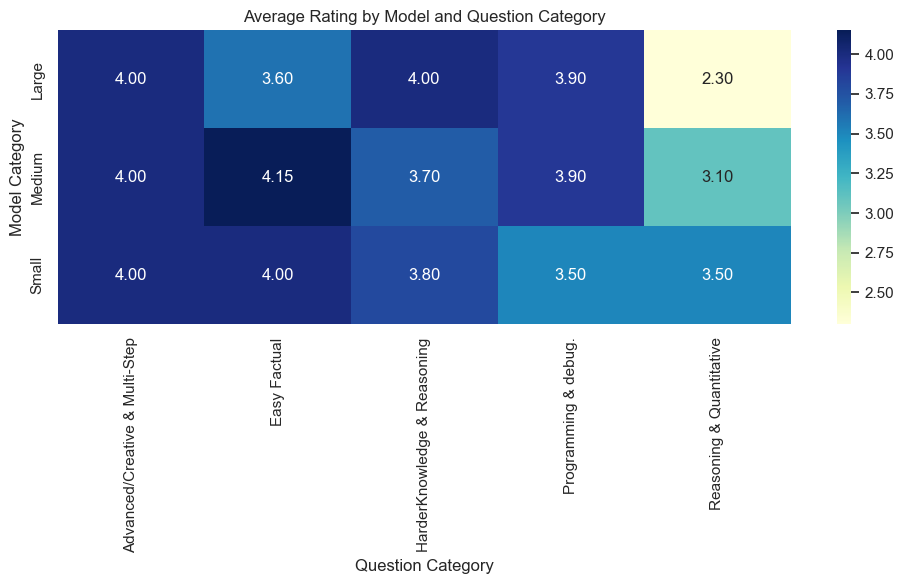

In [13]:
pivot = df.pivot_table(index='Model_Category', columns='Question_Category', values='Rating', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Rating by Model and Question Category')
plt.xlabel('Question Category')
plt.ylabel('Model Category')
plt.tight_layout()
plt.show()

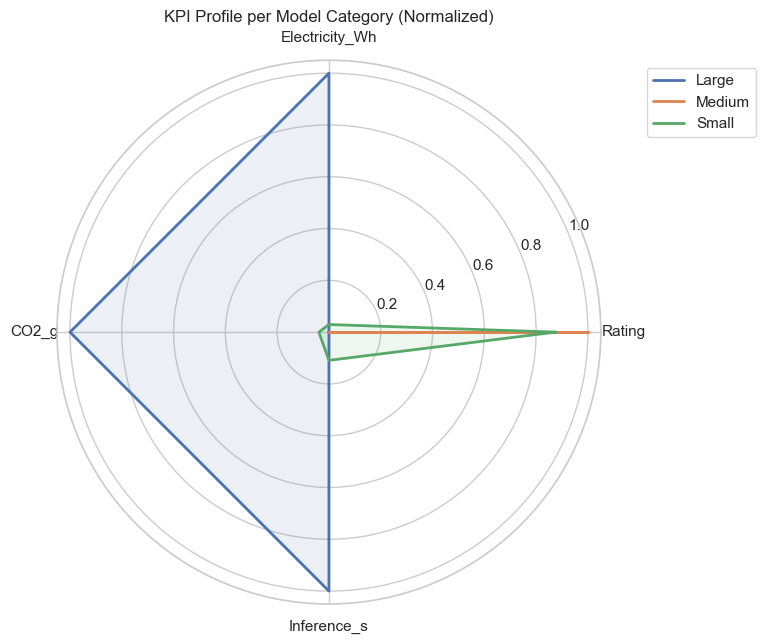

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate KPI averages
kpi_avg = df.groupby('Model_Category')[['Rating', 'Electricity_Wh', 'CO2_g', 'Inference_s']].mean()

# Normalize for radar chart
kpi_norm = (kpi_avg - kpi_avg.min()) / (kpi_avg.max() - kpi_avg.min())

# Radar chart setup
labels = kpi_norm.columns.tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

plt.figure(figsize=(8, 8))
for idx, row in kpi_norm.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=idx, linewidth=2)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], labels)
plt.title('KPI Profile per Model Category (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

### Chart 1: Carbon Emission per Question by Model (Line Chart)

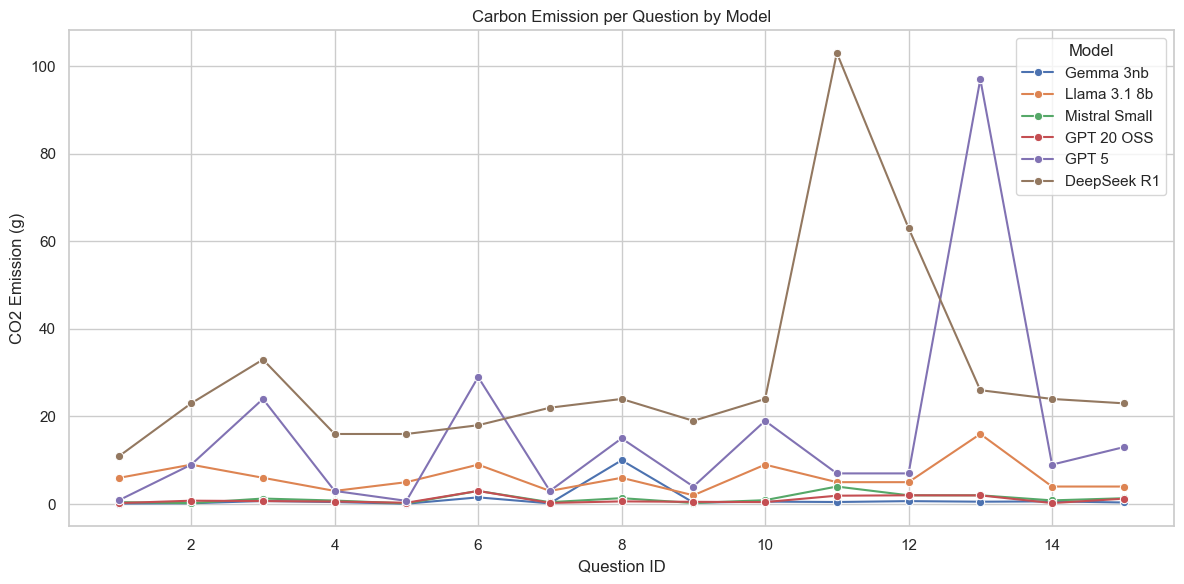

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Question_ID', y='CO2_g', hue='Model', marker='o')
plt.title('Carbon Emission per Question by Model')
plt.xlabel('Question ID')
plt.ylabel('CO2 Emission (g)')
plt.tight_layout()
plt.show()
# category wise analysis 


### Chart 2: Electricity Consumption per Question by Model (Area Chart)

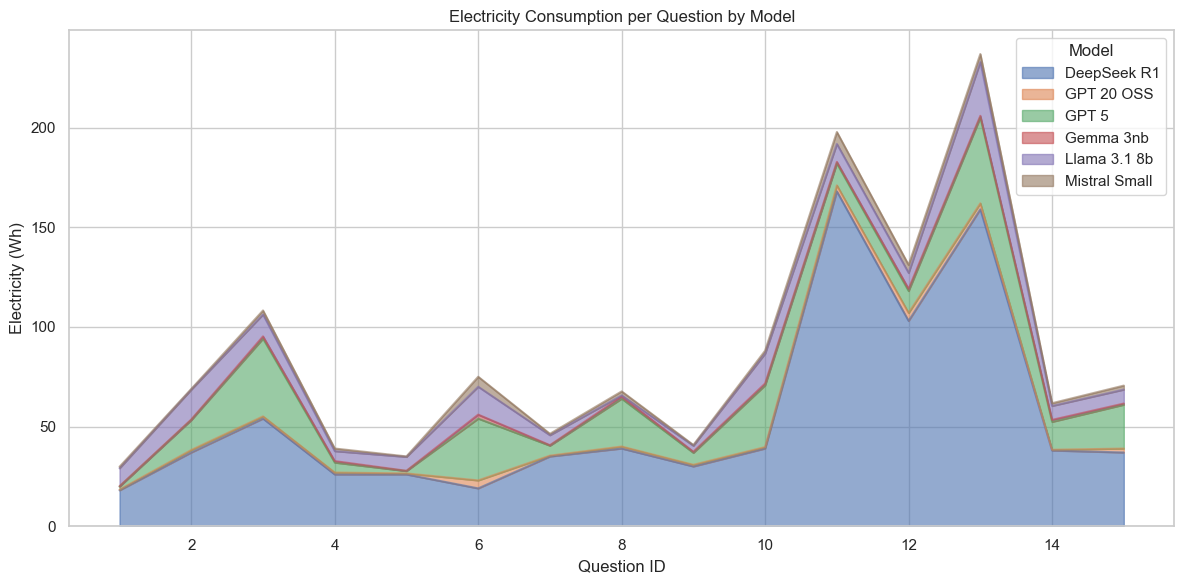

In [19]:
pivot_ec = df.pivot_table(index='Question_ID', columns='Model', values='Electricity_Wh')
pivot_ec.plot(kind='area', figsize=(12, 6), alpha=0.6)
plt.title('Electricity Consumption per Question by Model')
plt.xlabel('Question ID')
plt.ylabel('Electricity (Wh)')
plt.tight_layout()
plt.show()


### Chart 3: Inference Time(in Seconds) per Question by Model (Bar Chart) 

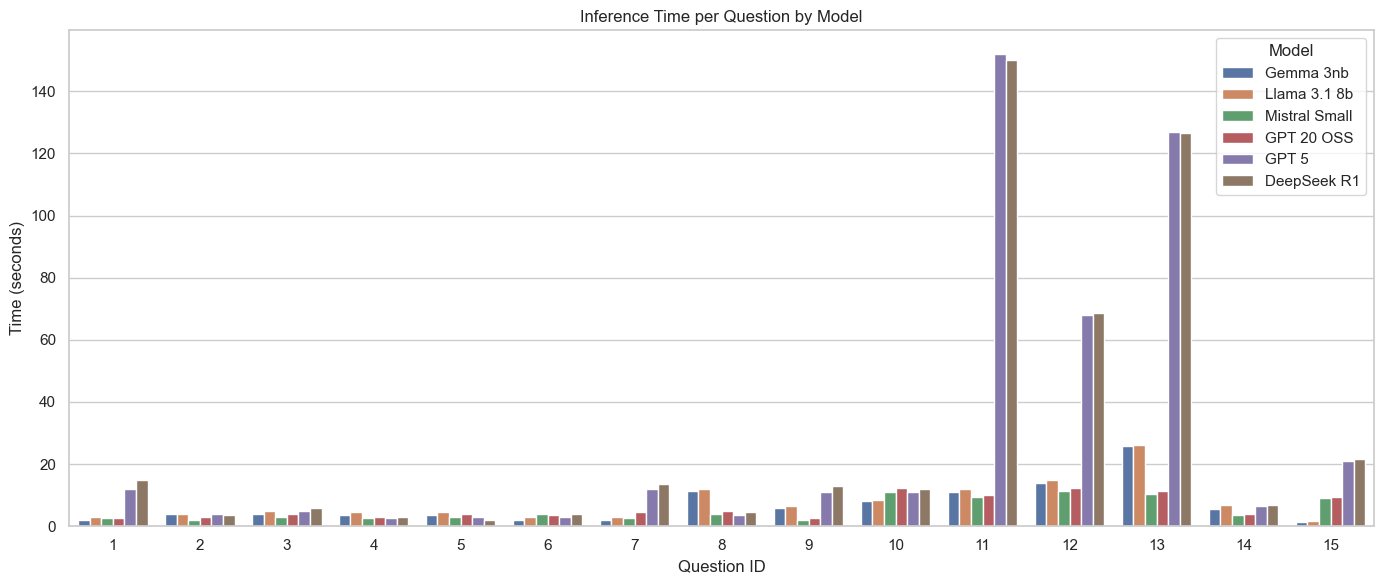

In [20]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='Question_ID', y='Inference_s', hue='Model')
plt.title('Inference Time per Question by Model')
plt.xlabel('Question ID')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()


### Chart 4: Average Rating Distribution (Pie Chart)

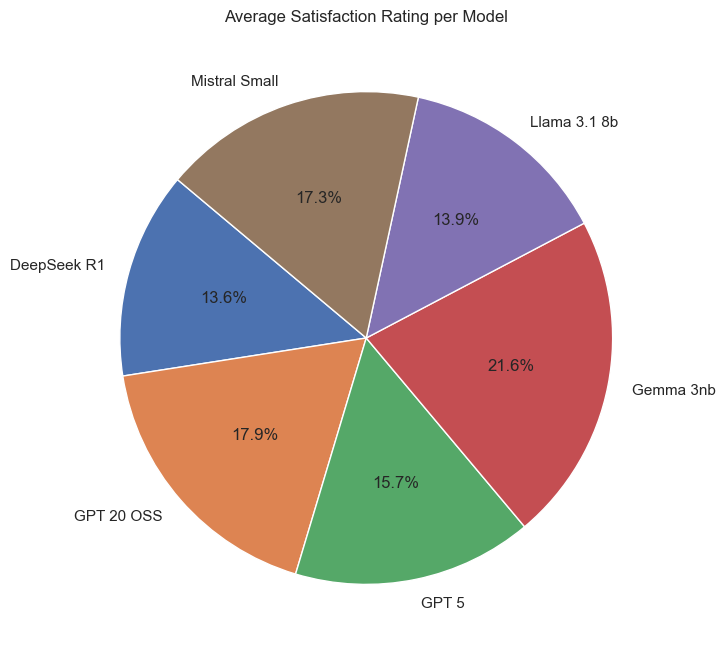

In [23]:
avg_rating = df.groupby('Model')['Rating'].mean()
plt.figure(figsize=(8, 8))
plt.pie(avg_rating, labels=avg_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Satisfaction Rating per Model')
plt.show()

### Chart 5: Total Carbon Emission by Models (Doughnut Chart)

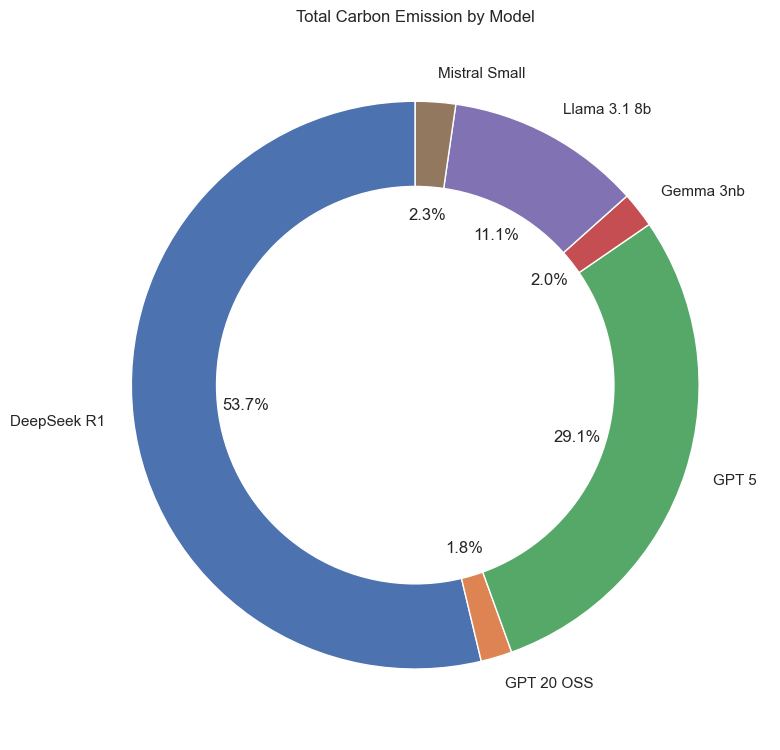

In [21]:
total_carbon = df.groupby('Model')['CO2_g'].sum()
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(total_carbon, labels=total_carbon.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Total Carbon Emission by Model')
plt.tight_layout()
plt.show()


🌿 Chart 5: Total Carbon Emission by Model (Doughnut Chart)
total_carbon = df.groupby('Model')['CO2_g'].sum()
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(total_carbon, labels=total_carbon.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Total Carbon Emission by Model')
plt.tight_layout()
plt.show()

📈 Chart 6: Scatter Plot of Electricity vs Carbon Emission (Pyplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electricity_Wh', y='CO2_g', hue='Model', style='Is_Math', s=100)
plt.title('Electricity vs Carbon Emission (Math vs Non-Math)')
plt.xlabel('Electricity (Wh)')
plt.ylabel('CO2 Emission (g)')
plt.tight_layout()
plt.show()

✅ Bonus Ideas
- Add tooltips using plotly.express for interactivity
- Export charts as PNG/PDF for presentations
- Use FacetGrid to compare math vs non-math questions
We can create a downloadable .ipynb notebook or add a KPI summary table


### 1. 📈 Quality vs Energy (Scatter Plot)

In [24]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Electricity_Wh',
    y='Rating',
    color='Model',
    hover_data=['Question_ID', 'CO2_g', 'Inference_s'],
    title='Quality vs Energy Consumption'
)
fig.update_layout(width=900, height=500)
fig.show()

### 2. 📈 Quality vs Cost (Scatter Plot)

In [25]:
fig = px.scatter(
    df,
    x='CO2_g',
    y='Rating',
    color='Model',
    hover_data=['Question_ID', 'Electricity_Wh', 'Inference_s'],
    title='Quality vs Carbon Emission (Cost Proxy)'
)
fig.update_layout(width=900, height=500)
fig.show()

### 3. ⏱️ Latency Comparison (Box Plot)

In [26]:
fig = px.box(
    df,
    x='Model',
    y='Inference_s',
    color='Model',
    title='Latency Distribution per Model'
)
fig.update_layout(width=900, height=500)
fig.show()


### 4. 🏆 Final “Best Trade-Off” Table
We'll define a simple scoring function


In [27]:
df['Score'] = (
    df['Rating'] * 2
    - df['Electricity_Wh'] * 0.5
    - df['CO2_g'] * 0.5
    - df['Inference_s'] * 0.2
).round(2)

tradeoff_table = df.groupby('Model').agg({
    'Rating': 'mean',
    'Electricity_Wh': 'mean',
    'CO2_g': 'mean',
    'Inference_s': 'mean',
    'Score': 'mean'
}).round(2).sort_values(by='Score', ascending=False)

tradeoff_table.reset_index(inplace=True)
tradeoff_table

,Model,Rating,Electricity_Wh,CO2_g,Inference_s,Score
0,Gemma 3nb,4.67,0.77,1.12,6.95,7.00
1,GPT 20 OSS,3.87,1.56,0.98,6.13,5.23
2,Mistral Small,3.73,2.10,1.26,5.39,4.71
3,Llama 3.1 8b,3.00,9.51,6.13,7.71,-3.36
4,GPT 5,3.40,17.31,16.04,29.43,-15.77
5,DeepSeek R1,2.93,55.20,29.67,30.00,-42.57


### This above table ranks models by their overall efficiency and satisfaction balance.

In [28]:

import streamlit as st

st.title("AI Model KPI Dashboard")

# st.plotly_chart(fig_quality_energy)
# st.plotly_chart(fig_quality_cost)
# st.plotly_chart(fig_latency)
st.dataframe(tradeoff_table)


2025-10-29 11:38:51.940 
  command:

    streamlit run C:\Users\Gaurav Chugh\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()